<h1 style = "font-family:'Bernard MT Condensed';font-size:3rem;color:darkred;">Module 11. Data Collection</h1>

<h2 style = "font-family:'Tw Cen MT';font-size:2.5rem;">Deliverable 2: Scrape and Analyze Mars Weather Data</h2>

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up Splinter
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path': ChromeDriverManager().install()}

# Launch the browser
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website
Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [3]:
# Visit the Mars news site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
row = table.find_all('tr')

# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in row:
    heading = row.find_all('th')
    data = row.find_all('td')

    # Extract the text from each cell in the row
    heading_data = [cell.text for cell in heading]
    row_data = [cell.text for cell in data]

    # Append the row data to the mars_data list
    mars_data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(mars_data, columns=mars_df)

In [8]:
# Remove the first row from the DataFrame
new_df = df.iloc[1:]

# Confirm DataFrame was created successfully
new_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [9]:
# Examine data type of each column
print(new_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
new_df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
new_df['sol'] = new_df['sol'].astype(int)
new_df['ls'] = new_df['ls'].astype(int)
new_df['month'] = new_df['month'].astype(int)
new_df['min_temp'] = new_df['min_temp'].astype(float)
new_df['pressure'] = new_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(new_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

#### 1.How many months exist on Mars?

The data on Mars indicate that there are 12 months in a year. 

In [12]:
# 1. How many months are there on Mars?
month_counts = new_df['month'].value_counts()
sorted_month = month_counts.sort_index()
sorted_month

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

#### 2.How many Martian (and not Earth) days worth of data exist in the scraped dataset?

Based on the scraped data, we found data for 1867 days

In [13]:
# 2. How many Martian days' worth of data are there?
mars_days = new_df['id'].value_counts()
len(mars_days)

1867

#### 3.What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [14]:
# 3. What is the average low temperature by month?
low_temp = new_df.groupby(['month']).mean()['min_temp']
low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

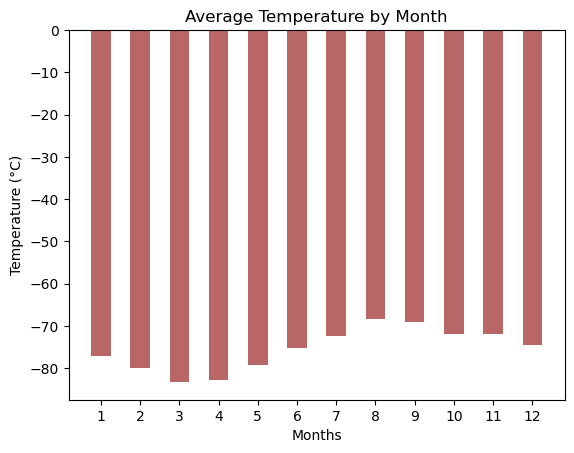

In [15]:
# Plot the average temperature by month
plt.bar(low_temp.index, low_temp.values, width=0.5, color= "darkred", alpha=0.6)
plt.title("Average Temperature by Month")
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.xticks(low_temp.index)
plt.rcParams["font.family"] = "MS Gothic"
plt.show()

As shown in the following graph, in the Martian year, the third month is the coldest, with an average temperature of -83.307 °C, and the hottest month is month 8, with an average temperature of -69.172 °C.

<function matplotlib.pyplot.show(close=None, block=None)>

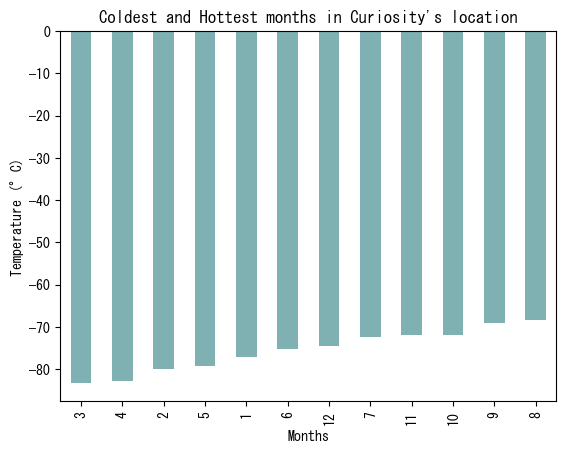

In [16]:
# Identify the coldest and hottest months in Curiosity's location
low_temp.sort_values().plot(kind='bar', color = 'cadetblue', alpha=0.8)
plt.title("Coldest and Hottest months in Curiosity's location")
plt.ylabel("Temperature (°C)")
plt.xlabel("Months")
plt.show

#### 4.Which months have the lowest and the highest atmospheric pressure on Mars? 

In [17]:
# 4. Average pressure by Martian month
pressure = new_df.groupby(['month']).mean()['pressure']
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In the following graph, Mars's lowest atmospheric pressure is in the sixth month, while its highest atmospheric pressure is in the ninth month.

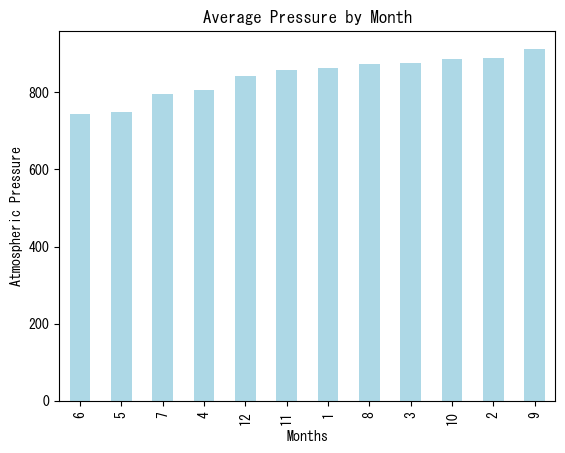

In [18]:
# Plot the average pressure by month
# plt.bar(pressure_sorted.index, pressure_sorted.values, width=0.5, color= "lightblue", alpha=0.8)
pressure.sort_values().plot(kind='bar', color='lightblue')
plt.title("Average Pressure by Month")
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.rcParams["font.family"] = "MS Gothic"
plt.show()

#### 5. About how many terrestrial (Earth) days exist in a Martian year?

- The first peak was approximately at $125$ terrestrial days

- The second peak was approximately at $800$ terrestrial days

- The third peak was approximately at $1475$ terrestrial days

Therefore, 

$800-125 = 675$

$1475-800 = 675$

According to the previous calculation, there are approximately 675 days that elapse on Earth between the hottest month of a Martian year and the next hottest month. 

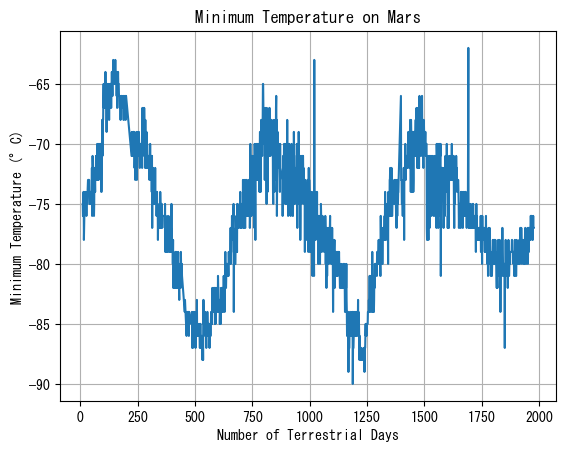

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(new_df['sol'], new_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature on Mars')
plt.grid(True)
plt.show()

Information confirmed through NASA confirms that each year on Mars takes 687 days on Earth. 

##### Reference
NASA, JPL and Caltech (no date) Mars in A minute: How long is a year on Mars? – NASA mars exploration, NASA. Available at: https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/#:~:text=The%20Earth%20zips%20around%20the,year%20means%20longer%20seasons%20too. (Accessed: 31 May 2023). 

### Step 6: Save the Data
Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
new_df.to_csv('output_data/mars_data.csv', index=False)

In [21]:
browser.quit()